In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.special as sp
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import scipy.constants as cte
import matplotlib.animation as animation
from IPython.display import HTML

### Armonicos esfericos
$$ Y(\theta,\phi) =\sqrt{\frac{(2l + 1)(l-m)!}{4 \pi (l + m)!}} e^{i m \phi} P_{l}^{m} \cos(\theta) $$

In [2]:
def SphericalHarmonics (l:int,m:int):

    """
    Parameters:
    - l:int -> quantum azimuthal number
    - m:int -> quantum magnetic number
    """

    # Grids of angles     
    theta = np.linspace(0,np.pi,100)
    phi = np.linspace(0,2*np.pi, 100)

    #Create meshgrid (theta-phi)
    theta, phi = np.meshgrid(theta, phi)

    # Calculate the Cartesian coordinates of each point in the mesh.
    xyz = np.array([np.sin(theta) * np.sin(phi), np.sin(theta) * np.cos(phi),    np.cos(theta)])

    #Harmonic calculation 
    Y = sp.sph_harm(m,l,phi,theta)
    
    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1) ** m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1) ** m * Y.real
    
    # Y in in cartesian coordinates 
    Yx, Yy, Yz = np.abs(Y) * xyz

    # Colur the plotted surface 
    cmap = plt.cm.ScalarMappable(cmap=cm.jet)
    cmap.set_clim(-0.5, 0.5)

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(projection='3d')

    ax.plot_surface(Yx,Yy,Yz, facecolors = cmap.to_rgba(Y.real),rstride = 1, cstride = 1)
    m = cm.ScalarMappable(cmap=cm.jet)
    m.set_array(Y)
    fig.colorbar(m, shrink=0.9)
    
    ax.set_xlabel('X', fontsize = 16)
    ax.set_ylabel('Y', fontsize = 16)
    ax.set_zlabel('Z', fontsize = 16)
    
    plt.show()

### Parte radial
$$ R(r) = N \rho^{l} L_{n+1}^{2l + 1}(\rho) e^{-\rho/2}  $$

Donde $N$ es
    $$ N = \sqrt{\frac{(n-l-1)!}{2n(n+1)!}\left(\frac{2}{na_0}\right)^3}$$
    
con:

$$a_0 = \frac{\hbar^2}{\mu e^2}$$ y $$\rho = \frac{2r}{na_0}$$

In [3]:
def statesRadialFuntion (n:int,l:int,state:str):
    """
    Parameters:
    - n:int -> principal quantum number
    - l:int -> azimuthal quantum number
    - state:str -> atomic state of hydrogen
    
    Retunr: 
    Radial function for the first sates of Hydrogen atom
    """
    a0 = 1
    r = np.linspace(0,20,100)
    rho = (2 * r) / (n * a0)
    #--------------------------------------------------------------------------------------------------------
    
    N = np.sqrt((np.math.factorial(n-l-1)/(2* n* np.math.factorial(n+l))) * (2/(n *a0)) ** 3)
    R = N  * sp.assoc_laguerre(rho,n-l-1,2*l+1) * (rho ** l) * np.exp(- (rho / 2))
    
    plt.figure(figsize=(6,6))
    plt.plot(r,R,label = state, color = 'k')
    plt.grid()
    plt.legend()
    plt.show()

### Niveles de energía
$$ E_n = - \frac{\mu}{2 \hbar^2 n^2}\left(\frac{e^2}{4 \pi \epsilon_0}\right)^2 $$

In [4]:
E = -13.598396 #eV
n = [1,2,3,4,5]
En = [E/(n[i]**2) for i in range(0,len(n))]
x = np.linspace(-5,5,100)

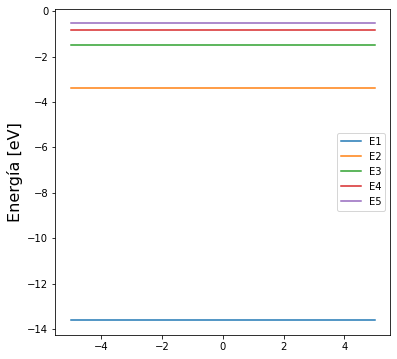

In [5]:
plt.figure(figsize = (6,6))
for i in range(0, len(En)):
    plt.plot(x, [En[i] for j in x], label = 'E'+str(n[i]))

plt.ylabel('Energía [eV]', fontsize = 16)
plt.legend()
plt.show()

In [6]:
def AnimationPsi(n,l,m):
    a0 = 1
    r = np.linspace(0,20,50)
    rho = (2 * r) / (n * a0)
    
    theta = np.linspace(0,np.pi,50)
    phi = np.linspace(0,2*np.pi, 50)

        #Create meshgrid (theta-phi)
    theta, phi = np.meshgrid(theta, phi)

    Y = sp.sph_harm(m,l,phi,theta)

    if m < 0:
        Y = np.sqrt(2) * (-1) ** m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1) ** m * Y.real

    N = np.sqrt((np.math.factorial(n-l-1)/(2* n* np.math.factorial(n+l))) * (2/(n *a0)) ** 3)
    R = N  * sp.assoc_laguerre(rho,n-l-1,2*l+1) * (rho ** l) * np.exp(- (rho / 2))
    
    cmap = plt.cm.ScalarMappable(cmap=cm.jet)
    cmap.set_clim(-0.5, 0.5)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    def actualizar(i):
        ax.clear()
        xyz = np.array([r[i] * np.sin(theta) * np.sin(phi), r[i] * np.sin(theta)* np.cos(phi),r[i] * np.cos(theta)])
        Yx, Yy, Yz = np.abs(Y) * xyz
        ax.plot_surface(Yx,Yy,Yz, facecolors = cmap.to_rgba(Y.real),rstride = 1, cstride = 1,alpha = abs(R[i]), shade = True)

        ax.set_xlim3d([-10.0, 10.0])
        ax.set_ylim3d([-10.0, 10.0])
        ax.set_zlim3d([-10.0, 10.0])
        
    ani = animation.FuncAnimation(fig,actualizar,range(len(r)), interval = 200, repeat = False)
    return HTML(ani.to_html5_video())


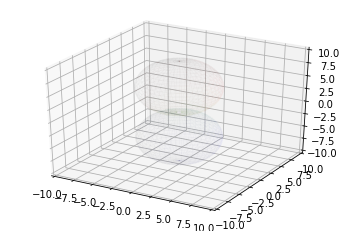

In [7]:
AnimationPsi(3,1,0)